In [1]:
#For Data Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For Balancing Dataset
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#For Calculation of Performance of Models
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#For Modelling Purpose
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_original = pd.read_csv("C:\\Users\\Keziah Joseph\\Desktop\\lanosrep\\tcejorp\\BankCampaignData.csv")

In [3]:
df_original.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit']
# df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
#        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
#        'previous', 'poutcome', 'deposit']

In [4]:
df = df_original

In [5]:
df.shape

(45211, 17)

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Exploratory Data Analysis

<AxesSubplot:xlabel='duration', ylabel='deposit'>

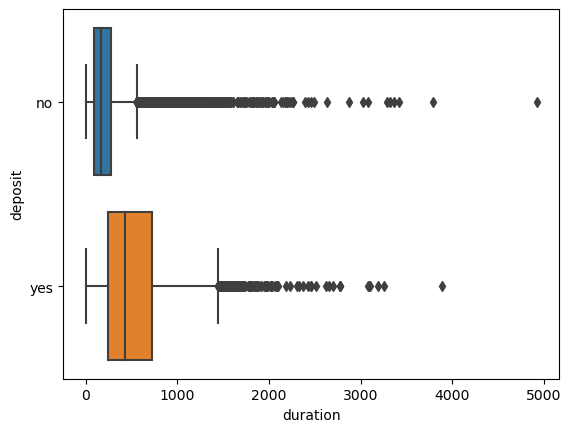

In [16]:
sns.boxplot(data=df_original, x="duration", y="deposit")

In [17]:
pd.DataFrame([[df_original[df_original['deposit']=='yes'].duration.mean(), df_original[df_original['deposit']=='yes'].duration.median()],
             [df_original[df_original['deposit']=='no'].duration.mean(), df_original[df_original['deposit']=='no'].duration.median()]],
             columns=['mean','median'], index=['yes','no'])

,mean,median
yes,537.294574,426.0
no,221.182806,164.0


### On average, the call duration of customers interested in buying the term deposit is longer. Duration of call is one of the factors that can be used to discern potential buyers.

<AxesSubplot:xlabel='age', ylabel='Count'>

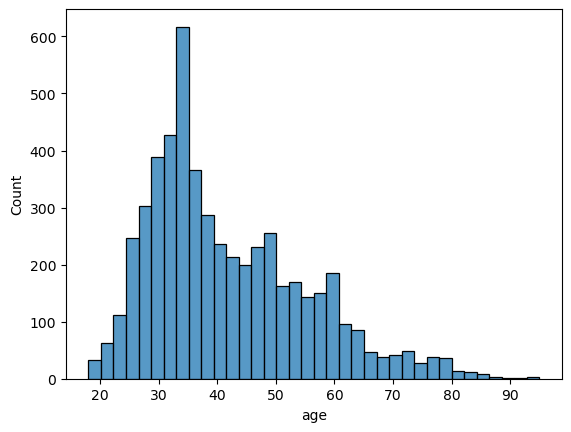

In [19]:
sns.histplot(data=df_original[df_original['deposit']=='yes'], x='age')

### The plot of age is positively skewed with more subcribers within the 30 - 40 year group

In [83]:
df_binned = pd.qcut(df['balance'], q=4)
df_binned.value_counts()

(-8019.001, 72.0]     11317
(448.0, 1428.0]       11306
(1428.0, 102127.0]    11297
(72.0, 448.0]         11291
Name: balance, dtype: int64

### Success of current term deposit marketing scheme consists of new customers followed by customers who bought from previous schemes. 

<AxesSubplot:xlabel='education', ylabel='count'>

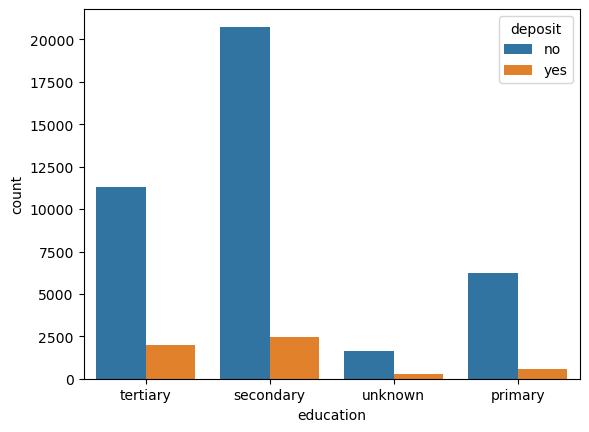

In [22]:
sns.countplot(data=df_original, x='education',hue='deposit')

[Text(0, 0, 'management'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'entrepreneur'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'unknown'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'admin.'),
 Text(7, 0, 'services'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'unemployed'),
 Text(10, 0, 'housemaid'),
 Text(11, 0, 'student')]

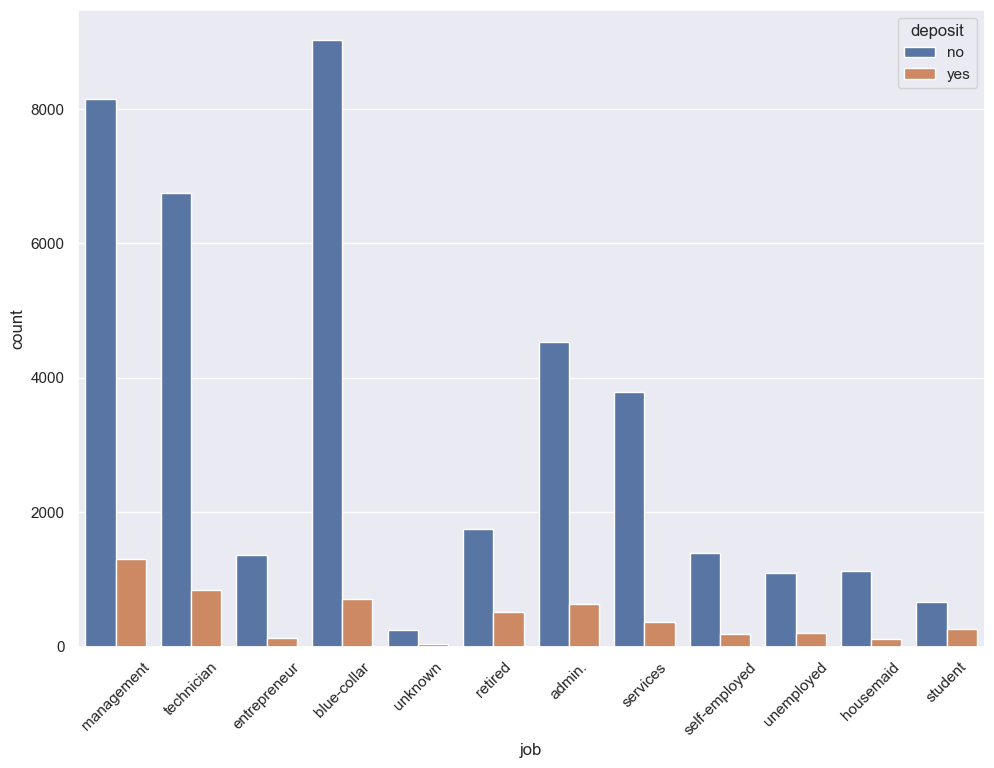

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
my_plot = sns.countplot(data=df_original, x='job',hue='deposit')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

<AxesSubplot:xlabel='campaign'>

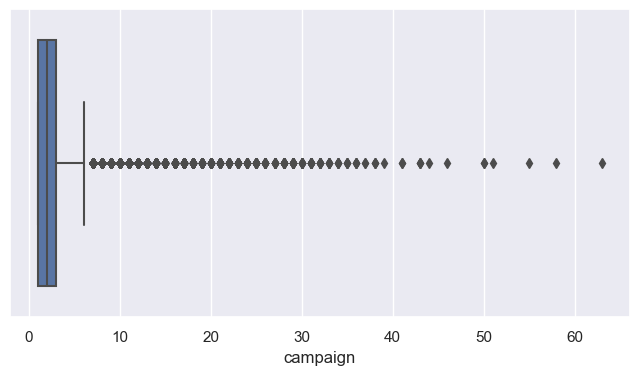

In [24]:
sns.set(rc={'figure.figsize':(8, 4)})
sns.boxplot(data=df_original, x='campaign')

### Around 75% of people subscribed to the term deposit, confirmed their purchase within the first 3 calls. To work more efficiently, this can be as a practice to move on to another customer after three failed attempts to convince a person. 

In [25]:
# Checking if previous campaign outcome has impact of success on current campaign
chi_test = df_original[(df_original['poutcome']=='success') | (df_original['poutcome']=='failure')]

<AxesSubplot:xlabel='poutcome', ylabel='count'>

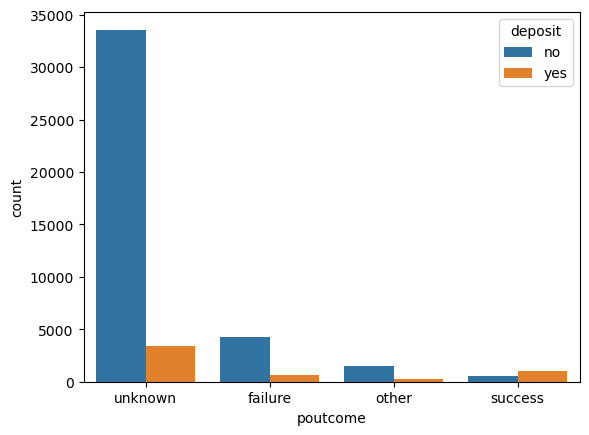

In [21]:
sns.countplot(data=df_original, x='poutcome',hue='deposit')

In [35]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = pd.crosstab(chi_test['poutcome'],chi_test['deposit'])
print("The obtained table with respective frequencies is \n")
print(table)

stat, p, dof, expected = chi2_contingency(table)
# print('dof=%d' % dof)
# print(expected)
# interpret test-statistic
prob = 0.95

if p <= alpha:
    print('\nThe test results indicate factors are Dependent (reject H0)')
else:
    print('\nThe test results indicate factors are Independent (fail to reject H0)')

The obtained table with respective frequencies is 

deposit     no  yes
poutcome           
failure   4283  618
success    533  978

The test results indicate factors are Dependent (reject H0)


In [46]:
# Now, calculate the odds ratios to determine the strength of the relationship between 
# previous campaign outcome and current campaign outcome

odds_depositer = table['yes']['success'] / table['yes']['failure']

odds_non_depositer = table['no']['success'] / table['no']['failure']

odds_ratio = odds_depositer/odds_non_depositer
odds_ratio

12.716606859869943

### The odds ratio that a depositer in the current campaign had previously subscribed to the bank campaign is high with 12.7 times that compared to someone who hadn't subscribed to the previous bank campaign.

# Data Preprocessing

In [8]:
# Nominal Data Label Encoding
df = pd.get_dummies(df,columns=['month','marital','housing','loan','default','contact'])

In [9]:
# Ordinal Data Label Encoding
df['job'].replace({'management':11,'entrepreneur':10,'services':9,'admin.':8,'self-employed':7,'technician':6,'housemaid':5,'blue-collar':4,'retired':3,'student':2,'unemployed':1,'unknown':0},inplace=True)

df['poutcome'].replace({'success':3,'other':2,'unknown':1,'failure':0},inplace=True)
df['education'].replace({'tertiary':3,'secondary':2,'primary':1,'unknown':0},inplace=True)

In [10]:
df['deposit'].replace({'yes':1,'no':0},inplace=True)

In [88]:
np.percentile(df, 25)

0.0

In [11]:
def preprocess_data(df, oversample):
    X = df.drop(['deposit'],axis=1)
    y = df['deposit']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)
    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=df.drop(['deposit'],axis=1).columns)
    X_test = pd.DataFrame(scaler.transform(X_test),columns=df.drop(['deposit'],axis=1).columns)
    if oversample:
        #ros = RandomOverSampler(random_state=42)
        sm = SMOTE(random_state = 42)
        X_train_sampled, y_train_sampled = sm.fit_resample(X_train, y_train)
        return X_train_sampled, X_test, y_train_sampled, y_test
    return X_train, X_test, y_train, y_test

# Predictive Model

In [12]:
X_train, X_test, y_train, y_test = preprocess_data(df,oversample=False)
rfc = RandomForestClassifier(class_weight='balanced')
learner = rfc.fit(X_train, y_train)
y_pred = learner.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11973
           1       0.69      0.34      0.45      1591

    accuracy                           0.90     13564
   macro avg       0.80      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [13]:
X_train, X_test, y_train, y_test = preprocess_data(df,oversample=True)
rfc = RandomForestClassifier()
learner = rfc.fit(X_train, y_train)
y_pred = learner.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     11973
           1       0.55      0.62      0.58      1591

    accuracy                           0.90     13564
   macro avg       0.75      0.78      0.76     13564
weighted avg       0.90      0.90      0.90     13564



In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X_train.values, y_train)
score = clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train.values)
dfbest = pd.DataFrame({"column_name":X_train.columns,"k_scores":score})

In [15]:
dfbest.sort_values('k_scores',axis=0,ascending=False)

,column_name,k_scores
5,duration,0.293724
4,day,0.075429
9,poutcome,0.060474
0,age,0.057967
6,campaign,0.055657
3,balance,0.055175
1,job,0.052849
2,education,0.041954
33,contact_unknown,0.034472
7,pdays,0.026034
